In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install fbprophet

In [ ]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)
import matplotlib.pyplot as plt

Prophet 0.7.1


In [ ]:
from fbprophet import Prophet

In [ ]:
dir(Prophet)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

# GDU dataset

In [ ]:
import pandas as pd 
df = pd.read_csv('/content/drive/MyDrive/Crop Research Project/Dataset_2.csv',parse_dates=["date"]).drop(["Forecast(GDUs for site_0)","Lower Confidence Bound(GDUs for site_0)","Upper Confidence Bound(GDUs for site_0)"],axis =1)

#select historical data
Selected_Gdu=(df['date']>='2009-01-01') & (df['date']<='2019-12-31')
data = df.loc[Selected_Gdu]

In [ ]:
data.shape

(4017, 2)

In [ ]:
data.head()

,date,GDUs for site_0
0,2009-01-01,11.438115
1,2009-01-02,11.603950
2,2009-01-03,11.606865
3,2009-01-04,11.917281
4,2009-01-05,12.283949


In [ ]:
data.tail()

,date,GDUs for site_0
4012,2019-12-27,11.799784
4013,2019-12-28,11.711865
4014,2019-12-29,12.456031
4015,2019-12-30,12.135616
4016,2019-12-31,11.876866


Plot the dataset

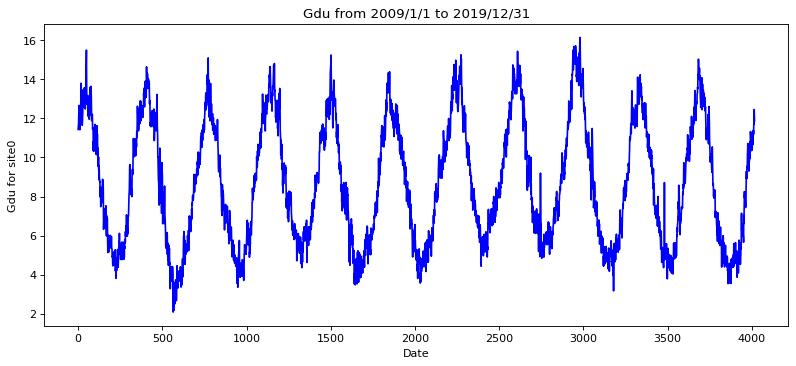

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5),dpi=80)
plt.plot(data.index,data['GDUs for site_0'],color='blue')
plt.gca().set(title='Gdu from 2009/1/1 to 2019/12/31', xlabel='Date',ylabel='Gdu for site0')
plt.show()

# Fit Prophet Model

In [ ]:
from pandas import to_datetime
# prepare expected column names
data.columns = ['ds', 'y']
data['ds']= to_datetime(data['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data

,ds,y
0,2009-01-01,11.438115
1,2009-01-02,11.603950
2,2009-01-03,11.606865
3,2009-01-04,11.917281
4,2009-01-05,12.283949
...,...,...
4012,2019-12-27,11.799784
4013,2019-12-28,11.711865
4014,2019-12-29,12.456031
4015,2019-12-30,12.135616


In [ ]:
# define the model
model = Prophet()
# fit the model
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
data.tail()

,ds,y
4012,2019-12-27,11.799784
4013,2019-12-28,11.711865
4014,2019-12-29,12.456031
4015,2019-12-30,12.135616
4016,2019-12-31,11.876866


In [ ]:
future_dates=model.make_future_dataframe(periods=366)

In [ ]:
future_dates.tail()


,ds
4378,2020-12-27
4379,2020-12-28
4380,2020-12-29
4381,2020-12-30
4382,2020-12-31


In [ ]:
prediction=model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-01-01,8.861287,11.050329,12.740226,8.861287,8.861287,3.043837,3.043837,3.043837,-0.002951,-0.002951,-0.002951,3.046788,3.046788,3.046788,0.0,0.0,0.0,11.905124
1,2009-01-02,8.861010,11.114025,12.846997,8.861010,8.861010,3.130444,3.130444,3.130444,0.031671,0.031671,0.031671,3.098773,3.098773,3.098773,0.0,0.0,0.0,11.991453
2,2009-01-03,8.860732,11.148407,12.828255,8.860732,8.860732,3.167532,3.167532,3.167532,0.017032,0.017032,0.017032,3.150499,3.150499,3.150499,0.0,0.0,0.0,12.028264
3,2009-01-04,8.860455,11.175010,12.966096,8.860455,8.860455,3.208071,3.208071,3.208071,0.005952,0.005952,0.005952,3.202118,3.202118,3.202118,0.0,0.0,0.0,12.068526
4,2009-01-05,8.860178,11.158320,12.954729,8.860178,8.860178,3.227255,3.227255,3.227255,-0.026518,-0.026518,-0.026518,3.253773,3.253773,3.253773,0.0,0.0,0.0,12.087433


Narrative

yhat : the predicted forecast

yhat_lower : the lower border of the prediction

yhat_upper: the upper border of the prediction

In [ ]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4378,2020-12-27,8.590308,10.238143,12.464354,7.900835,9.224609,2.783717,2.783717,2.783717,0.005952,0.005952,0.005952,2.777765,2.777765,2.777765,0.0,0.0,0.0,11.374025
4379,2020-12-28,8.590382,10.255895,12.466540,7.898325,9.227465,2.806733,2.806733,2.806733,-0.026518,-0.026518,-0.026518,2.833250,2.833250,2.833250,0.0,0.0,0.0,11.397114
4380,2020-12-29,8.590455,10.384470,12.635645,7.895928,9.230321,2.870853,2.870853,2.870853,-0.016913,-0.016913,-0.016913,2.887766,2.887766,2.887766,0.0,0.0,0.0,11.461308
4381,2020-12-30,8.590529,10.331237,12.718934,7.890412,9.233177,2.933161,2.933161,2.933161,-0.008273,-0.008273,-0.008273,2.941434,2.941434,2.941434,0.0,0.0,0.0,11.523691
4382,2020-12-31,8.590603,10.404191,12.640080,7.883205,9.235845,2.991442,2.991442,2.991442,-0.002951,-0.002951,-0.002951,2.994393,2.994393,2.994393,0.0,0.0,0.0,11.582045


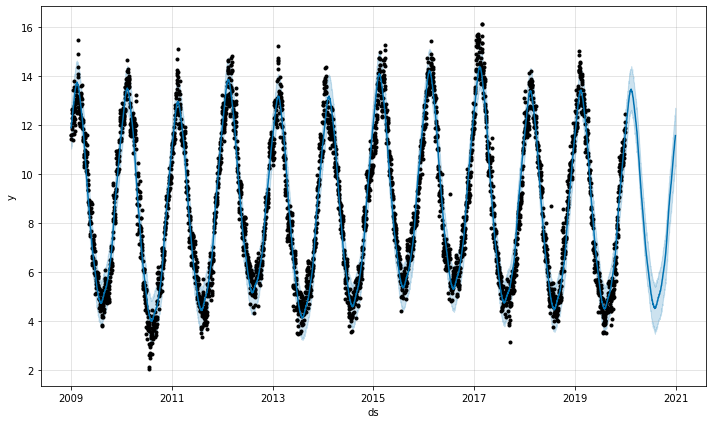

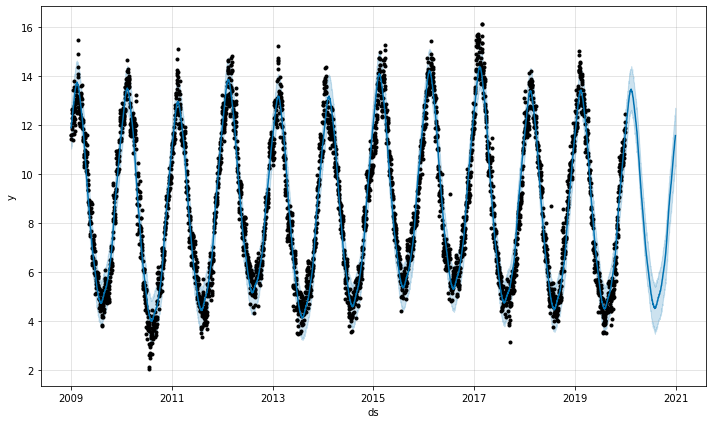

In [ ]:
model.plot(prediction)

Narrative

A Trending data

Black dots : the actual data points in our dataset.

Deep blue line : the predicted forecast/the predicted values

Light blue line : the boundaries

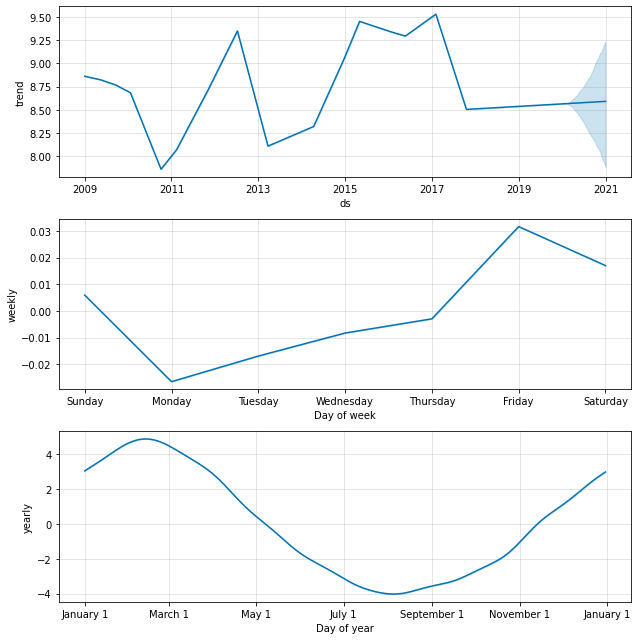

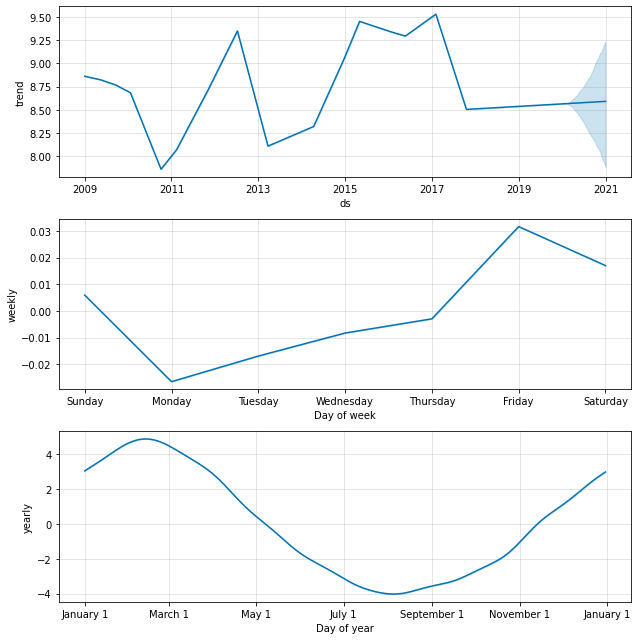

In [ ]:
 model.plot_components(prediction)

In [ ]:
data.head()

,ds,y
0,2009-01-01,11.438115
1,2009-01-02,11.603950
2,2009-01-03,11.606865
3,2009-01-04,11.917281
4,2009-01-05,12.283949


# Evaluate the model


Here we do cross-validation to assess prediction performance on a horizon of 60 days, starting with 1825 days of training data in the first cutoff and then making predictions every 30 days.

e.g.(initial = 1825. period =30, horizon =60)

The initial model will be trained on the first 1,825 days of data. It will forecast the next 60 days of data (because horizon is set to 60). The model will then train on the initial period + the period (1,825 + 30 days in this case) and forecast the next 60 days. It will continued like this, adding another 30 days to the training data and then forecasting for the next 60 until there is no longer enough data to do this.

first 5 year --> train set
and then first 5 year +  30 days to forecast the next 60 days

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='1825 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 11 forecasts with cutoffs between 2014-01-26 00:00:00 and 2018-12-31 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-01-27,13.278573,12.459281,14.090245,12.943116,2014-01-26
1,2014-01-28,13.329272,12.518402,14.126561,12.460616,2014-01-26
2,2014-01-29,13.406658,12.634784,14.238804,12.267282,2014-01-26
3,2014-01-30,13.481793,12.635630,14.299908,12.472282,2014-01-26
4,2014-01-31,13.584438,12.698797,14.395128,12.973115,2014-01-26


In [ ]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
4010,2019-12-27,10.850917,9.817082,11.978016,11.799784,2018-12-31
4011,2019-12-28,10.898727,9.760897,11.959146,11.711865,2018-12-31
4012,2019-12-29,10.941758,9.826090,12.042461,12.456031,2018-12-31
4013,2019-12-30,10.957894,9.845920,12.043826,12.135616,2018-12-31
4014,2019-12-31,11.020473,9.906277,12.117967,11.876866,2018-12-31


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,0.906235,0.951964,0.716630,0.078136,0.065929,0.707096
1,38 days,0.916248,0.957208,0.723109,0.078570,0.068277,0.699841
2,39 days,0.912292,0.955140,0.723052,0.078299,0.066828,0.699841
3,40 days,0.915092,0.956604,0.724720,0.078688,0.068277,0.698481
4,41 days,0.921444,0.959919,0.730131,0.079673,0.069705,0.697121


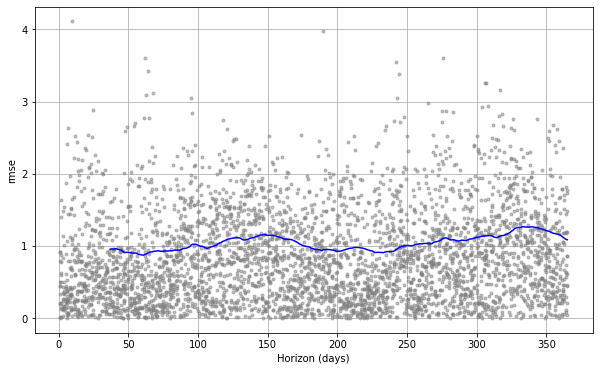

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')